# Data Cleaning and Imputation

In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load the CSV file into a pandas DataFrame
data = pd.read_csv('Prediction_simple.csv')

# Step 1: Handle Missing Values
# Create an imputer to fill missing values (NaN) with the mean of each column
imputer = SimpleImputer(strategy='mean')
data_cleaned = imputer.fit_transform(data)
data_cleaned = pd.DataFrame(data_cleaned, columns=data.columns)

# Step 2: Handle Outliers (Optional)
# You can add code here to identify and handle outliers if needed.

# Step 3: Data Transformation (e.g., Standardization)
# Create a StandardScaler to standardize the data (mean=0, std=1)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned)
data_scaled = pd.DataFrame(data_scaled, columns=data_cleaned.columns)

# Save the cleaned and transformed data to a new CSV file
data_scaled.to_csv('Cleaned_Prediction_simple.csv', index=False)


# Data Transformation and Feature Engineering

In [2]:
import pandas as pd

# Load your preprocessed dataset
data = pd.read_csv('Cleaned_Prediction_simple.csv')

# Create a new feature by combining existing features (e.g., creating a 'Total_Balance' feature)
data['Total_Balance'] = data['current_balance'] + data['previous_month_end_balance']

# Binning or categorizing a numeric feature (e.g., creating an 'Age_Group' feature)
bins = [0, 18, 35, 60, float("inf")]
labels = ['<18', '18-35', '36-60', '60+']
data['Age_Group'] = pd.cut(data['age'], bins=bins, labels=labels)

# Encoding categorical features (if needed)
# You can use techniques like one-hot encoding or label encoding for categorical features.

# Save the modified dataset
data.to_csv('Feature_engineered_.csv', index=False)


#  Data Visualization

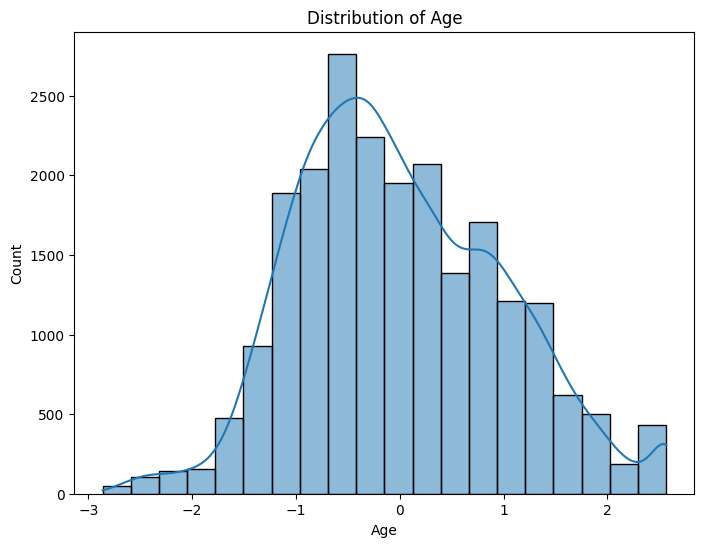

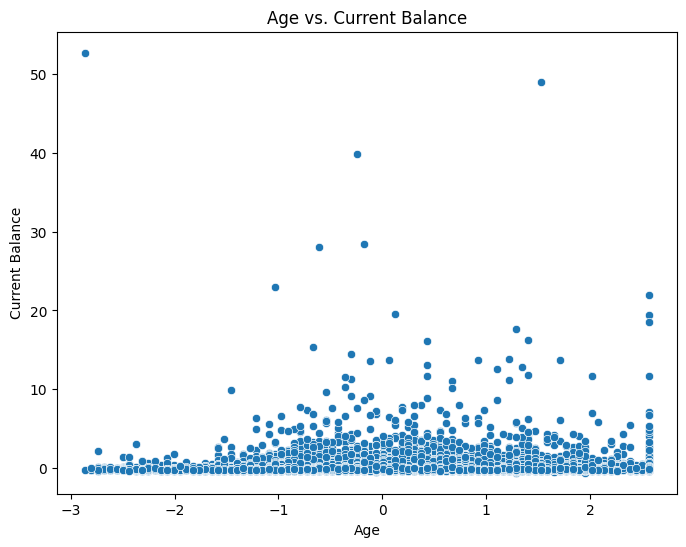

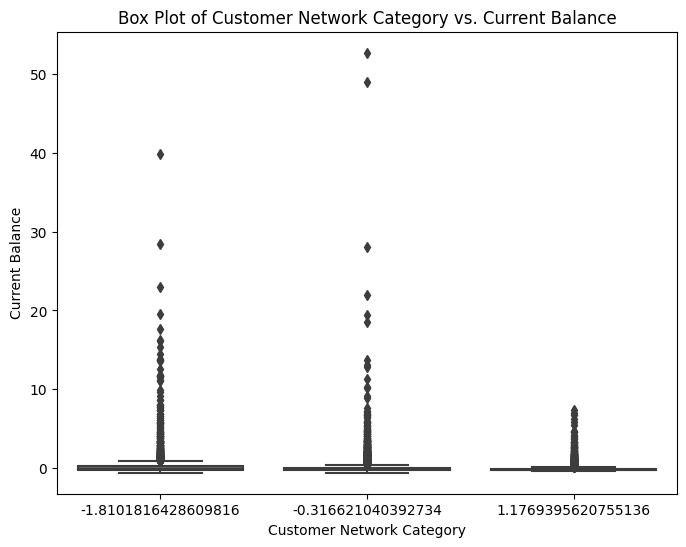

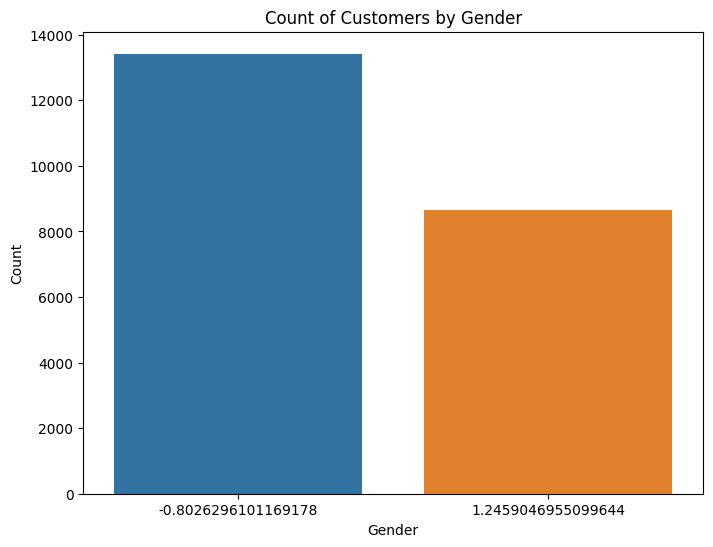

In [3]:
# import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your cleaned dataset
data = pd.read_csv('Feature_engineered_Prediction_simple.csv')

# Visualize the distribution of 'age'
plt.figure(figsize=(8, 6))
sns.histplot(data['age'], bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

# Visualize the relationship between 'age' and 'current_balance'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='current_balance', data=data)
plt.xlabel('Age')
plt.ylabel('Current Balance')
plt.title('Age vs. Current Balance')
plt.show()

# Visualize a box plot of 'customer_nw_category'
plt.figure(figsize=(8, 6))
sns.boxplot(x='customer_nw_category', y='current_balance', data=data)
plt.xlabel('Customer Network Category')
plt.ylabel('Current Balance')
plt.title('Box Plot of Customer Network Category vs. Current Balance')
plt.show()

# Visualize a countplot of 'gender'
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=data)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Customers by Gender')
plt.show()


# Outlier Detection

Outliers:
       customer_id   vintage       age    gender  dependents  occupation  \
193      -1.699421  0.163846  2.017245 -0.802630   -0.361368    0.220134   
263      -1.689464 -0.712524  1.407228 -0.802630    3.467828   -0.747148   
295      -1.684771  2.294408  2.200250  1.245905   -0.361368   -0.747148   
375      -1.672525 -0.549886 -0.239819 -0.802630   -0.361368    1.187415   
515      -1.649520 -0.170188 -0.971839  1.245905   -0.361368   -0.747148   
...            ...       ...       ...       ...         ...         ...   
21787     1.692517 -1.463163 -0.117815  1.245905   -0.361368   -0.747148   
21920     1.713119  0.524152 -0.544827 -0.802630   -0.361368   -0.747148   
21951     1.718727  0.359638  0.614205 -0.802630   -0.361368   -0.747148   
21972     1.721932  1.155940 -0.239819 -0.802630   -0.361368    1.187415   
21987     1.724679 -0.688754 -0.666831 -0.802630   -0.361368    1.187415   

           city  customer_nw_category  branch_code  \
193    0.509176        

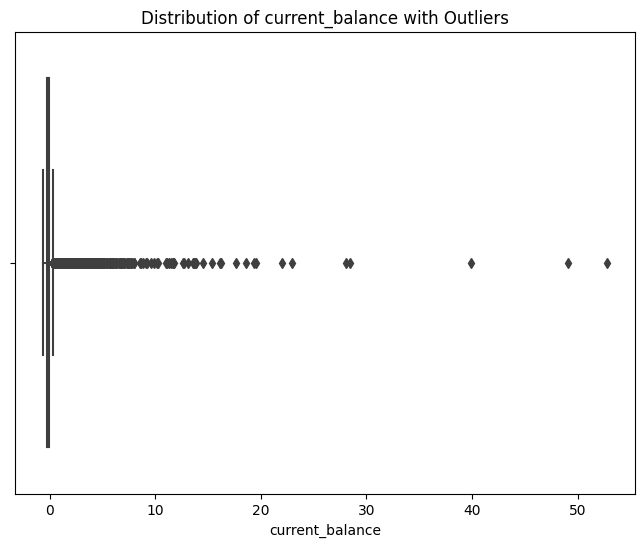

In [4]:
import pandas as pd
from scipy import stats

# Load your cleaned dataset
data = pd.read_csv('Cleaned_Prediction_simple.csv')

# Specify the column for which you want to detect outliers
column_name = 'current_balance'

# Calculate Z-scores for the specified column
z_scores = stats.zscore(data[column_name])

# Define a threshold for identifying outliers (e.g., z-score > 3 or < -3)
threshold = 3

# Find the indices of outliers
outlier_indices = [i for i, z in enumerate(z_scores) if abs(z) > threshold]

# Get the actual outlier values
outliers = data.iloc[outlier_indices]

# Print the outlier values
print("Outliers:")
print(outliers)

# Remove outliers from the dataset if needed
# data_no_outliers = data.drop(outlier_indices)

# Visualize the distribution of the specified column with outliers
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x=data[column_name])
plt.xlabel(column_name)
plt.title(f'Distribution of {column_name} with Outliers')
plt.show()


# Data Quality Monitoring

Missing Values:
customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

Duplicate Records:
0

Numeric Column Statistics:
        customer_id       vintage           age        gender    dependents  \
count  2.206700e+04  2.206700e+04  2.206700e+04  2.206700e+04  2.206700e+04   
mean   

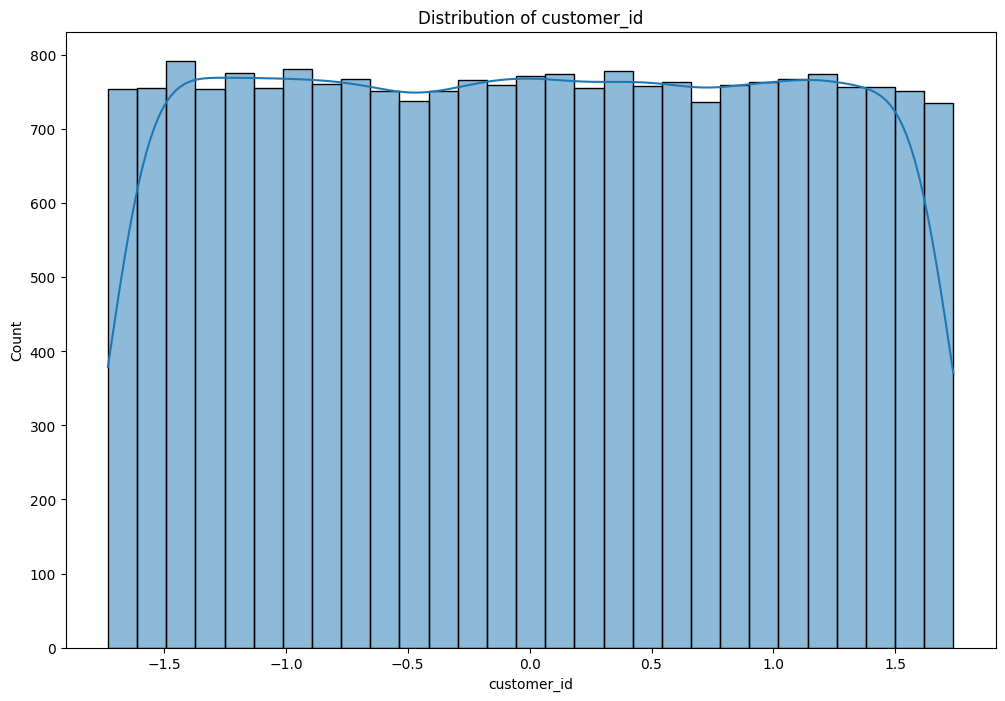

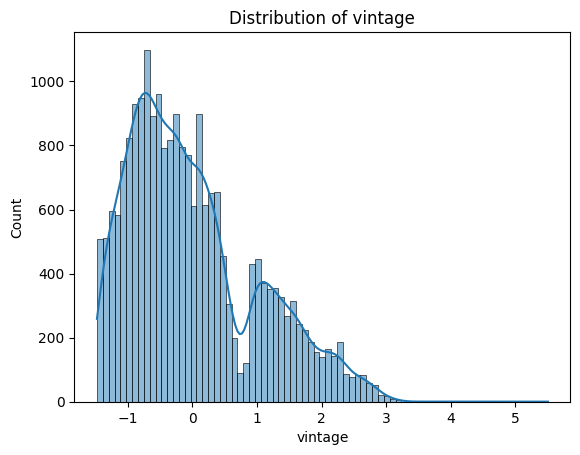

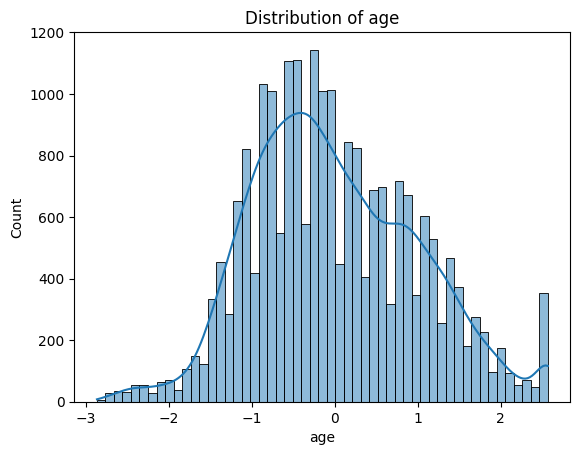

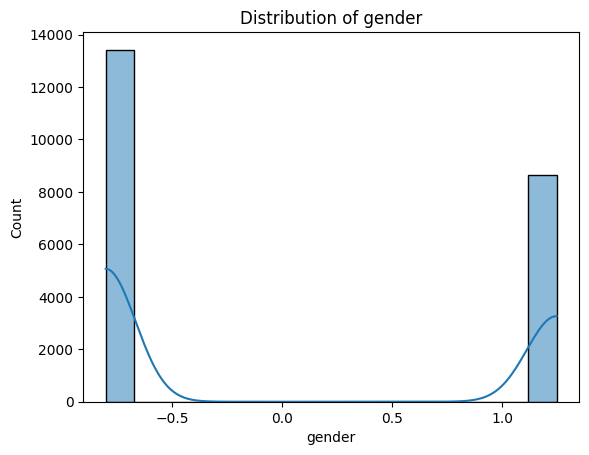

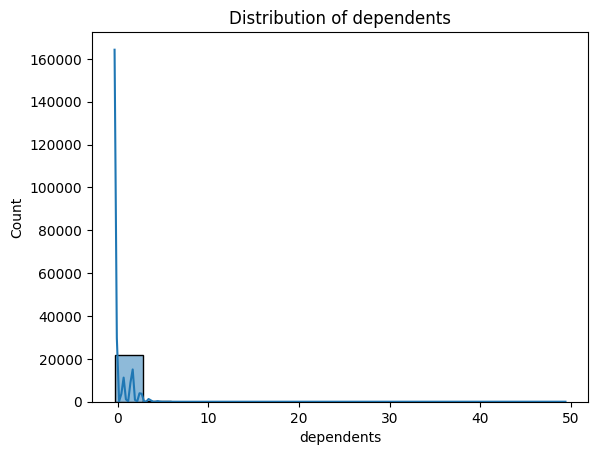

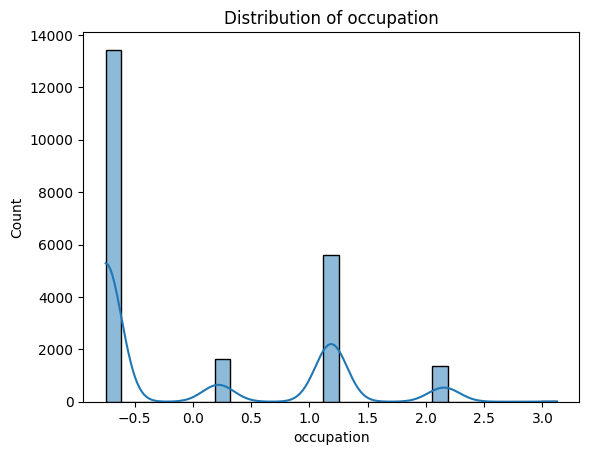

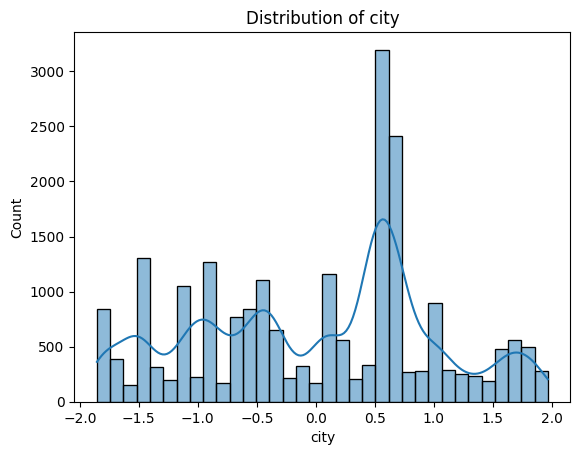

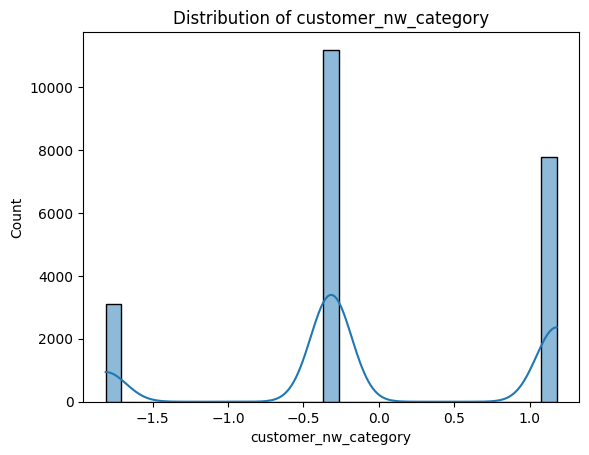

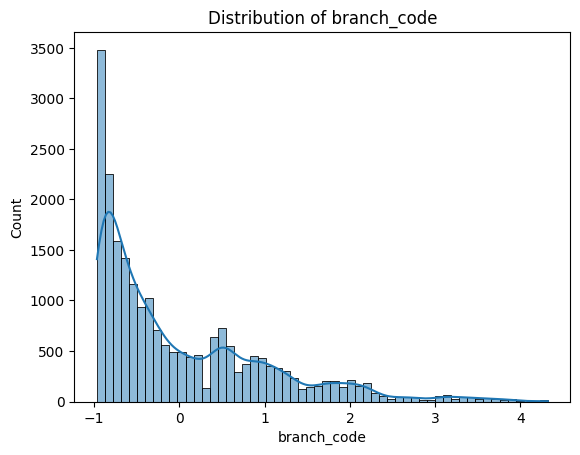

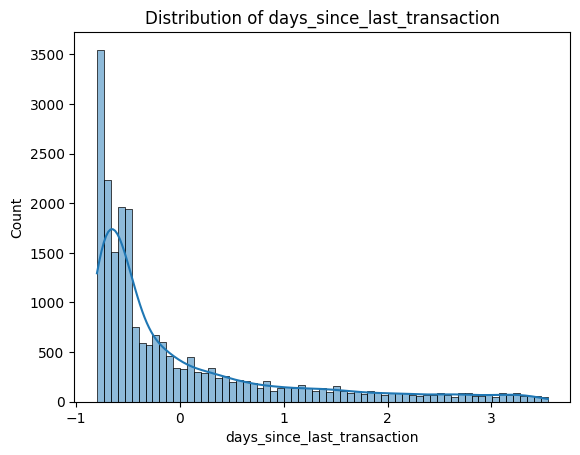

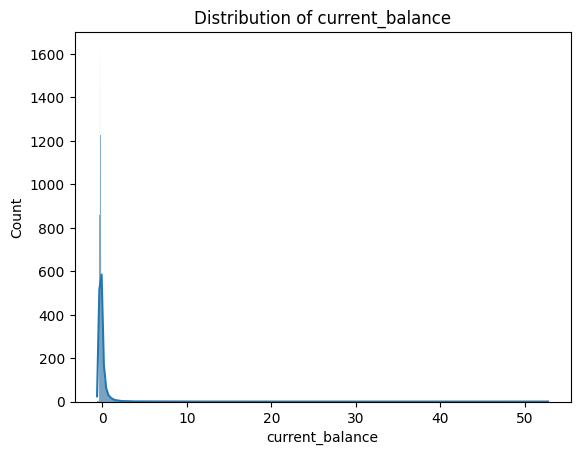

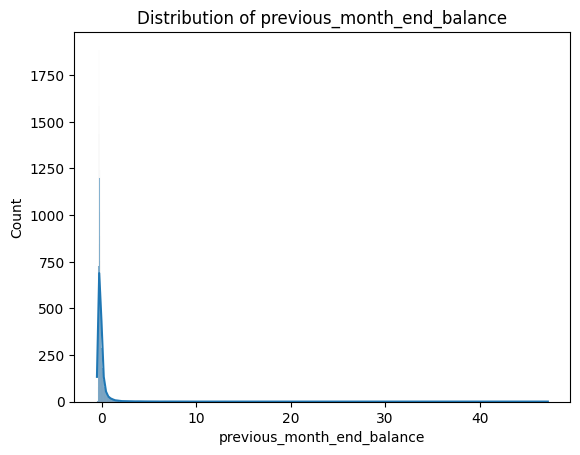

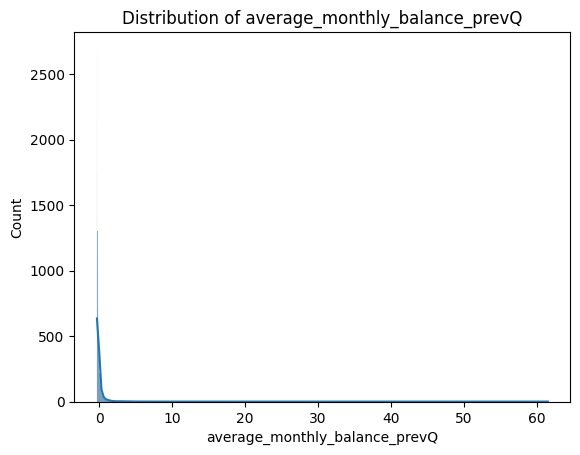

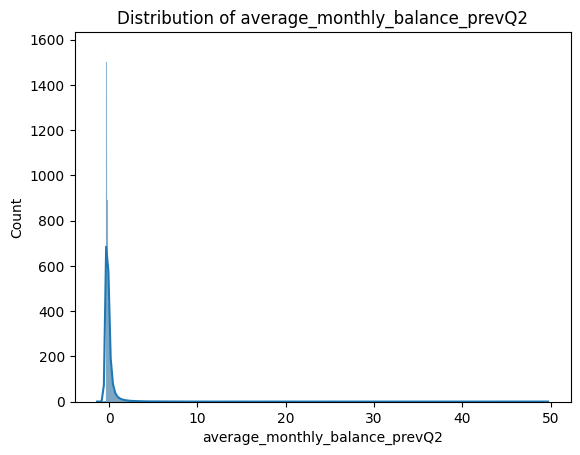


KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x0000020656AAAF70> (for post_execute):



KeyboardInterrupt



Error in callback <function flush_figures at 0x0000020656EAEE50> (for post_execute):



KeyboardInterrupt



In [6]:
import pandas as pd

# Load your dataset
data = pd.read_csv('Cleaned_Prediction_simple.csv')

# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

# Check for duplicate records
duplicate_records = data.duplicated().sum()
print("\nDuplicate Records:")
print(duplicate_records)

# Check basic statistics of numeric columns
numeric_stats = data.describe()
print("\nNumeric Column Statistics:")
print(numeric_stats)

# Check data types of columns
data_types = data.dtypes
print("\nData Types:")
print(data_types)

# Check unique values in categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
unique_values = {}
for col in categorical_columns:
    unique_values[col] = data[col].nunique()
print("\nUnique Values in Categorical Columns:")
print(unique_values)

# Check the data distribution of numeric columns
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
for col in data.select_dtypes(include=['float64']):
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


In [7]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


# Natural Language Processing

In [10]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load your data
data = pd.read_csv('Cleaned_Prediction_simple.csv')

# Assuming you have a column containing text data
text_data = data['overall grade']

# Text Preprocessing
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()  # Convert text to lowercase
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

text_data = text_data.apply(preprocess_text)

# Sentiment Analysis using TextBlob
def analyze_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

data['sentiment'] = text_data.apply(analyze_sentiment)

# Feature extraction (Bag of Words)
vectorizer = CountVectorizer(max_features=1000)  # You can adjust max_features as needed
X = vectorizer.fit_transform(text_data)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, data['sentiment'], test_size=0.2, random_state=42)

# Train a simple Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mscma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

    negative       1.00      1.00      1.00      3544
    positive       1.00      1.00      1.00       870

    accuracy                           1.00      4414
   macro avg       1.00      1.00      1.00      4414
weighted avg       1.00      1.00      1.00      4414



# Data Preprocessing Pipelines

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
path = 'Cleaned_Prediction_simple.csv'
df = pd.read_csv(path)

# Separate features and target variable
X = df.drop(columns=['churn'])
y = df['churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps for numeric and categorical features
numeric_features = ['vintage', 'age', 'dependents', 'days_since_last_transaction', 'current_balance', 'previous_month_end_balance',
                    'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2', 'current_month_credit',
                    'previous_month_credit', 'current_month_debit', 'previous_month_debit', 'current_month_balance',
                    'previous_month_balance']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Standardize numeric features
])

# Combine numeric and categorical transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

# Create a preprocessing pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the training data
X_train_prep = pipeline.fit_transform(X_train)

# Transform the testing data
X_test_prep = pipeline.transform(X_test)


In [12]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install --upgrade pandas-profiling

Note: you may need to restart the kernel to use updated packages.


# Custom Data Cleaning and Transformation Functions

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling

data = pd.read_csv('Cleaned_Prediction_simple.csv')

# Perform data profiling and create a report
profile = pandas_profiling.ProfileReport(data)
profile.to_file("data_quality_report.html")

C:\Users\mscma\AppData\Local\Temp\ipykernel_21808\3146081596.py:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]